In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
from sklearn.linear_model import LinearRegression
plt.style.use('classic')
from sklearn.model_selection import train_test_split

## Reading the dataset ##

In [2]:
df = pd.read_excel('C:/Users/000K1G744/Desktop/Incident management/IKS_Inc.xlsx', sheet_name='Sheet1')

## Removing the cancelled state ##

In [3]:
dataframe = df[df['state']!= 'Cancelled']                  

## Removing the Columns Which is having 90% or more mising values or columns which have no relevant contribution

In [4]:
dataframe = dataframe.drop(['due_date','additional_assignee_list','order','u_external_user_name','u_qs_actual_start','u_qs_affected_date','hold_reason','u_lan_boh_time_spent','u_billing_type','sn_esign_document','u_sc_escalation_count','u_squad','u_external_user_email','group_list','u_qs_duplicate_of','universal_request','correlation_id','correlation_display','u_response_sla_criteria','u_resolve_sla_criteria','u_billing_count','user_input','time_worked','u_location_of_business_supported','sn_esign_esignature_configuration','u_external_user_location','u_reason_for_cancelling','expected_start','u_resolved_by_group','approval_history','skills','follow_up','u_known_error_problem','end','route_reason','u_qs_resolver_group','rfc','sys_tags','u_integration_transfer_group','u_ntt_status_code','caused_by','parent','u_mio_invoked_date','u_esc_acknowledgement2','u_escalation_l2_timestamp','u_esc_acknowledgement1','u_escalation_l1_timestamp','u_escalation_count','u_escalation_date','u_on_hold_reason','u_ntt_time_spent','u_sla_target','u_qs_processmanagergroup','u_qs_processmanager','problem_id','u_qs_reopened_at','reopened_time','reopened_by','watch_list','closed_by','parent_incident'],axis=1)

In [5]:
dataframe = dataframe.drop(['comments','description','short_description','close_notes'],axis=1)

In [6]:
dataframe = dataframe.drop(['u_qs_contact_number'],axis=1)

In [7]:
dataframe = dataframe.drop(['_id'],axis=1)

In [8]:


## Checking the missing value percentage ##
percent_missing = dataframe.isnull().sum() * 100 / len(dataframe)
missing_value = pd.DataFrame({'column_name': dataframe.columns,
                                 'percent_missing': percent_missing})

In [9]:
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 100000)

In [10]:
missing_value['percent_missing'].sort_values(ascending=False)

company                       78.242903
u_qs_opened_by_group          68.535924
subcategory                   32.542465
assigned_to                   28.726116
u_location_details            28.509554
service_offering              28.194287
business_service              28.194287
category                      27.042237
location                      25.586706
u_warranty_expired            10.521664
u_end_of_support              10.520927
cmdb_ci                       10.478204
work_end                       8.126961
work_start                     4.802664
u_cause                        1.386290
resolved_by                    0.657788
closed_at                      0.603279
create_closed_days             0.603279
month_year_closed              0.603279
year_of_closed                 0.603279
open_closed_seconds            0.603279
open_closed_age                0.603279
hour_of_day_closed             0.603279
day_of_week_closed             0.603279
day_of_month_closed            0.603279


## Missing Value Imputation ##

In [11]:
dataframe['company'] = dataframe['company'].fillna("Unknown")
dataframe['u_qs_opened_by_group'] = dataframe['u_qs_opened_by_group'].fillna("No Group")
dataframe['subcategory'] = dataframe['subcategory'].fillna("No Category")
dataframe['assigned_to'] = dataframe['assigned_to'].fillna("Non_Assigned")
dataframe['u_location_details'] = dataframe['u_location_details'].fillna("No Location")
dataframe['business_service'] = dataframe['business_service'].fillna("No Business")
dataframe['service_offering'] = dataframe['service_offering'].fillna("No Service")
dataframe['category'] = dataframe['category'].fillna("No Category")
dataframe['category'] = dataframe['category'].fillna("No Category")
dataframe['location'] = dataframe['location'].fillna("location")
dataframe['u_warranty_expired'] = dataframe['u_warranty_expired'].fillna("No Warranty")
dataframe['cmdb_ci'] = dataframe['cmdb_ci'].fillna("Unknown")
dataframe['work_end'] = dataframe['work_end'].fillna("2021-06-27 16:00:19")
dataframe['work_start'] = dataframe['work_start'].fillna("2021-03-01 13:26:05")
dataframe['u_cause'] = dataframe['u_cause'].fillna("No Cause")
dataframe['resolved_by'] = dataframe['resolved_by'].fillna("No Resolved")
dataframe['open_closed_age'] = dataframe['open_closed_age'].fillna("No age")
dataframe['closed_at'] = dataframe['closed_at'].fillna("2021-06-04 17:00:13")
dataframe['create_closed_age'] = dataframe['create_closed_age'].fillna("No Closed")
dataframe['day_of_week_closed'] = dataframe['day_of_week_closed'].fillna("Unknown")
dataframe['month_year_closed'] = dataframe['month_year_closed'].fillna("Jul 2021")
dataframe['close_code'] = dataframe['close_code'].fillna("Unknown")
dataframe['day_of_week_resolved'] = dataframe['day_of_week_resolved'].fillna("Unknown")
dataframe['create_resolved_age'] = dataframe['create_resolved_age'].fillna("Unknown")
dataframe['resolved_at'] = dataframe['resolved_at'].fillna("2021-05-30 04:46:16")
dataframe['month_year_resolved'] = dataframe['month_year_resolved'].fillna("Jul 2021")
dataframe['open_resolved_age'] = dataframe['open_resolved_age'].fillna("Unknown")
dataframe['calendar_duration'] = dataframe['calendar_duration'].fillna("Unknown")
dataframe['business_stc'] = pd.to_numeric(dataframe['business_stc'],errors = 'coerce')
dataframe['calendar_stc'] = pd.to_numeric(dataframe['calendar_stc'],errors = 'coerce')
dataframe['year_of_closed'] = dataframe['year_of_closed'].fillna(dataframe['year_of_closed'].mode()[0])
dataframe['month_of_closed'] = dataframe['month_of_closed'].fillna(dataframe['month_of_closed'].mode()[0])
dataframe['create_closed_days'] = dataframe['create_closed_days'].fillna(dataframe['create_closed_days'].mean())
dataframe['create_closed_days'] = dataframe['create_closed_days'].fillna(dataframe['create_closed_days'].mean())
dataframe['open_closed_days'] = dataframe['open_closed_days'].fillna(dataframe['open_closed_days'].mean())
dataframe['create_closed_seconds'] = dataframe['create_closed_seconds'].fillna(dataframe['create_closed_seconds'].mean())
dataframe['open_closed_seconds'] = dataframe['open_closed_seconds'].fillna(dataframe['open_closed_seconds'].mean())
dataframe['hour_of_day_closed'] = dataframe['hour_of_day_closed'].fillna(dataframe['hour_of_day_closed'].mode()[0])
dataframe['day_of_month_closed'] = dataframe['day_of_month_closed'].fillna(dataframe['day_of_month_closed'].mode()[0])
dataframe['day_of_month_resolved'] = dataframe['day_of_month_resolved'].fillna(dataframe['day_of_month_resolved'].mode()[0])
dataframe['month_of_resolved'] = dataframe['month_of_resolved'].fillna(dataframe['month_of_resolved'].mode()[0])
dataframe['year_of_resolved'] = dataframe['year_of_resolved'].fillna(dataframe['year_of_resolved'].mode()[0])
dataframe['open_resolved_seconds'] = dataframe['open_resolved_seconds'].fillna(dataframe['open_resolved_seconds'].mean())
dataframe['create_resolved_seconds'] = dataframe['create_resolved_seconds'].fillna(dataframe['create_resolved_seconds'].mean())
dataframe['open_resolved_days'] = dataframe['open_resolved_days'].fillna(dataframe['open_resolved_days'].mode()[0])
dataframe['create_resolved_days'] = dataframe['create_resolved_days'].fillna(dataframe['create_resolved_days'].mode()[0])
dataframe['business_duration'] =  dataframe['business_duration'].fillna("Unknown")   
dataframe['business_duration_mins'] = dataframe['business_duration_mins'].fillna(dataframe['business_duration_mins'].mean())
dataframe['calendar_duration_mins'] = dataframe['calendar_duration_mins'].fillna(dataframe['calendar_duration_mins'].mean())
dataframe['calendar_stc'] = dataframe['calendar_stc'].fillna(dataframe['calendar_stc'].mode()[0])
dataframe['business_stc'] = dataframe['business_stc'].fillna(dataframe['business_stc'].mode()[0])
dataframe['u_end_of_support'] = dataframe['u_end_of_support'].fillna("No Support")
dataframe['child_incidents'] = pd.to_numeric(dataframe['child_incidents'],errors='coerce').fillna(0)
dataframe['sys_mod_count'] = pd.to_numeric(dataframe['sys_mod_count'],errors='coerce').fillna(0)

## Converting the datetime object to datetime data type ##

In [12]:
dataframe['opened_at'] = pd.to_datetime(dataframe['opened_at'])
dataframe['resolved_at'] = pd.to_datetime(dataframe['resolved_at'])
dataframe['work_end'] = pd.to_datetime(dataframe['work_end'])
dataframe['work_start']= pd.to_datetime(dataframe['work_start'])
dataframe['closed_at'] = pd.to_datetime(dataframe['closed_at'])

## Segregating the datasets into four subsets based on their priority ##

In [13]:
dataframe_p1 = dataframe[dataframe['priority'] == 'P1 - Critical']
dataframe_p2 = dataframe[dataframe['priority'] == 'P2 - High']
dataframe_p3 = dataframe[dataframe['priority'] == 'P3 - Medium']
dataframe_p4 = dataframe[dataframe['priority'] == 'P4 - Low']

## MTTR Calculation ##

In [14]:
import datetime
ct = datetime.datetime.now()
from datetime import datetime
now = datetime.now()
today = pd.to_datetime("now")

In [15]:
dataframe_p1['diff_seconds'] = ((dataframe_p1['resolved_at'] - dataframe_p1['opened_at'])/np.timedelta64(1,'h'))
dataframe_p2['diff_seconds'] = ((dataframe_p2['resolved_at'] - dataframe_p2['opened_at'])/np.timedelta64(1,'h'))
dataframe_p3['diff_seconds'] = ((dataframe_p3['resolved_at'] - dataframe_p3['opened_at'])/np.timedelta64(1,'h'))
dataframe_p4['diff_seconds'] = ((dataframe_p4['resolved_at'] - dataframe_p4['opened_at'])/np.timedelta64(1,'h'))
dataframe_p1['diff_seconds_1'] = ((today - dataframe_p1['opened_at']) / np.timedelta64(1,'h'))
dataframe_p2['diff_seconds_1'] = ((today - dataframe_p2['opened_at']) / np.timedelta64(1,'h'))
dataframe_p3['diff_seconds_1'] = ((today - dataframe_p3['opened_at']) / np.timedelta64(1,'h'))
dataframe_p4['diff_seconds_1'] = ((today - dataframe_p4['opened_at']) / np.timedelta64(1,'h'))

C:\Users\000K1G~1\AppData\Local\Temp/ipykernel_8624/3422141719.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe_p1['diff_seconds'] = ((dataframe_p1['resolved_at'] - dataframe_p1['opened_at'])/np.timedelta64(1,'h'))
C:\Users\000K1G~1\AppData\Local\Temp/ipykernel_8624/3422141719.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe_p2['diff_seconds'] = ((dataframe_p2['resolved_at'] - dataframe_p2['opened_at'])/np.timedelta64(1,'h'))
C:\Users\000K1G~1\AppData\Local\Temp/ipykernel_8624/3422

In [16]:
def derived_column(dataframe_p1):
    if dataframe_p1['state'] == 'Resolved':
        return dataframe_p1.diff_seconds
    elif dataframe_p1['state'] == 'Closed':
        return dataframe_p1.diff_seconds
    elif dataframe_p1['state'] == 'In Progress':
        return dataframe_p1.diff_seconds_1
    elif dataframe_p1['state'] == 'SLA Hold':
        return dataframe_p1.diff_seconds_1
    else:
        return dataframe_p1.diff_seconds_1

In [17]:
dataframe_p1['MTTR'] = dataframe_p1.apply(derived_column,axis=1)
dataframe_p2['MTTR'] = dataframe_p2.apply(derived_column,axis=1)
dataframe_p3['MTTR'] = dataframe_p3.apply(derived_column,axis=1)
dataframe_p4['MTTR'] = dataframe_p4.apply(derived_column,axis=1)

C:\Users\000K1G~1\AppData\Local\Temp/ipykernel_8624/479008129.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe_p1['MTTR'] = dataframe_p1.apply(derived_column,axis=1)
C:\Users\000K1G~1\AppData\Local\Temp/ipykernel_8624/479008129.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe_p2['MTTR'] = dataframe_p2.apply(derived_column,axis=1)
C:\Users\000K1G~1\AppData\Local\Temp/ipykernel_8624/479008129.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [18]:
dataframe_p1 = dataframe_p1.drop(['number','sys_created_by','task_effective_number','sys_updated_by','opened_by','sys_created_on','caller_id','u_qs_reported_by','sys_id','activity_due','xtracted_on','diff_seconds','diff_seconds_1','sys_updated_on','opened_at','resolved_at','work_end','work_start','closed_at'],axis=1)

In [19]:
dataframe_p1 = dataframe_p1.drop(['_index','_type','upon_reject','state','priority','sys_domain_path','u_qs_type','notify','sys_class_name','sla_due','u_escalation','escalation','upon_approval','u_sc_escalation','sys_domain','incident_state','severity','approval','account_prefix','account_name','account_domain','open_extracted_age','create_extracted_age'],axis=1)

## Splitting the dataframe based on training and testing ##

In [20]:
X1 = dataframe_p1[[i for i in list(dataframe_p1.columns) if i!='MTTR']]
y1 = dataframe_p1['MTTR']

In [21]:
## Split into train and test sets ##
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X1, y1, test_size=0.33, random_state=1)

In [22]:
 X_train_1.shape,X_test_1.shape,y_train_1.shape,y_test_1.shape

((255, 94), (126, 94), (255,), (126,))

## Feature Selection and finding important features ##

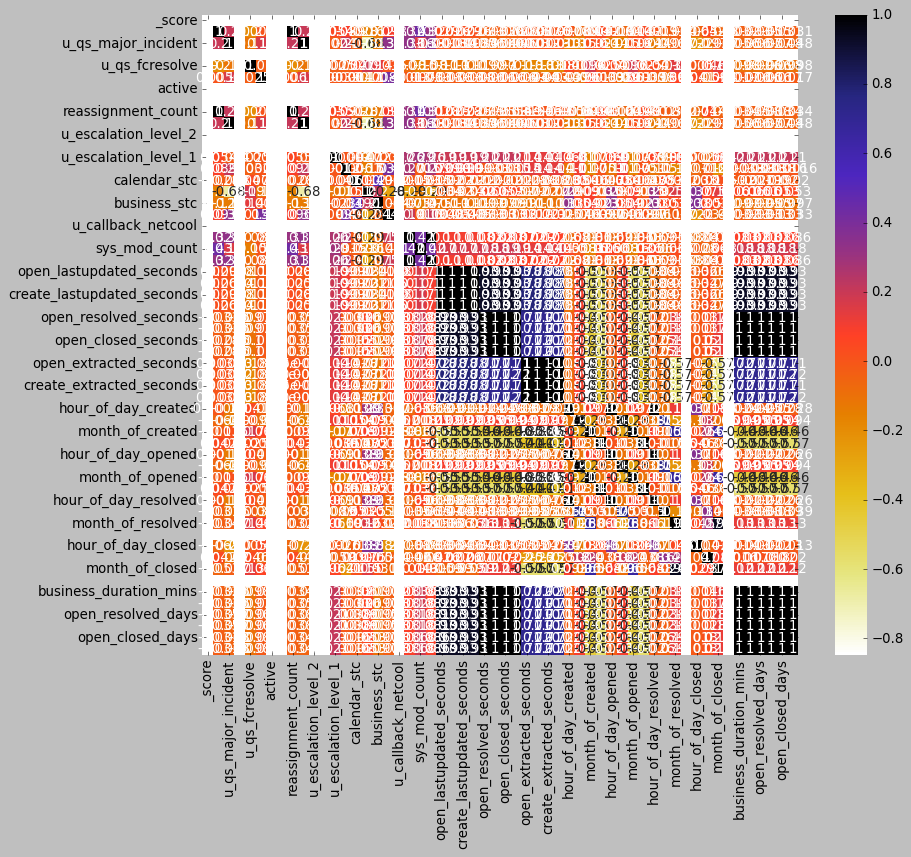

In [26]:
import seaborn as sns
plt.figure(figsize=(12,10))
cor = X_train_1.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

## Correaltion matrix ##

In [27]:
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr      

In [30]:
corr_features = correlation(X_train_1,0.7)

In [31]:
corr_features

{'business_duration_mins',
 'calendar_duration_mins',
 'create_closed_days',
 'create_closed_seconds',
 'create_extracted_days',
 'create_extracted_seconds',
 'create_lastupdated_days',
 'create_lastupdated_seconds',
 'create_resolved_days',
 'create_resolved_seconds',
 'day_of_month_opened',
 'day_of_month_resolved',
 'hour_of_day_opened',
 'hour_of_day_resolved',
 'month_of_closed',
 'month_of_created',
 'month_of_opened',
 'open_closed_days',
 'open_closed_seconds',
 'open_extracted_days',
 'open_extracted_seconds',
 'open_lastupdated_days',
 'open_resolved_days',
 'open_resolved_seconds',
 'reassignment_count',
 'reopen_count',
 'u_mio_invoked',
 'year_of_opened'}

## One hot encoding ##

In [35]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\000K1G744\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [36]:
import category_encoders as ce
import pandas as pd

In [37]:
#Create object for one-hot encoding
encoder=ce.OneHotEncoder(cols=['u_end_of_support','u_qs_opened_by_group','u_warranty_expired','cmdb_ci','impact','business_duration','service_offering','assigned_to','u_location_details','resolved_by','business_service','subcategory','close_code','assignment_group','calendar_duration','contact_type','urgency','u_preferred_language','company','u_cause','location','category','open_lastupdated_age','create_lastupdated_age','day_of_week_created','month_year_created','day_of_week_opened','month_year_opened','day_of_week_resolved','month_year_resolved','day_of_week_closed','month_year_closed','reopen_count_range','reassignment_count_range','open_resolved_age','create_resolved_age','open_closed_age','create_closed_age'],handle_unknown='return_nan',return_df=True,use_cat_names=True)

In [38]:
X_train_1_new = encoder.fit_transform(X_train_1)

In [39]:
X_test_1_new = encoder.transform(X_test_1)

In [40]:
X_train_1_modified = X_train_1_new.fillna(X_train_1_new.mean())
X_test_1_modified = X_test_1_new.fillna(X_test_1_new.mean())

In [41]:
X_train_1_modified.shape,X_test_1_modified.shape

((255, 1200), (126, 1200))

## Mutual Information gain ##

In [48]:
from sklearn.feature_selection import mutual_info_regression
mutual_info = mutual_info_regression(X_train_1_modified,y_train_1)
mutual_info

array([2.22044605e-16, 2.21251078e-01, 9.96100946e-02, ...,
       3.83911459e-01, 3.48278439e-01, 1.84959573e-01])

In [49]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train_1_modified.columns
mutual_info.sort_values(ascending=False)

open_resolved_seconds                                                               4.274033e+00
calendar_duration_mins                                                              3.976237e+00
create_resolved_seconds                                                             3.640290e+00
open_closed_seconds                                                                 2.277607e+00
create_closed_seconds                                                               2.204695e+00
open_lastupdated_seconds                                                            2.071721e+00
create_lastupdated_seconds                                                          2.029614e+00
business_duration_mins                                                              1.743786e+00
open_resolved_days                                                                  1.345691e+00
create_resolved_days                                                                1.344585e+00
create_closed_days            

<AxesSubplot:>

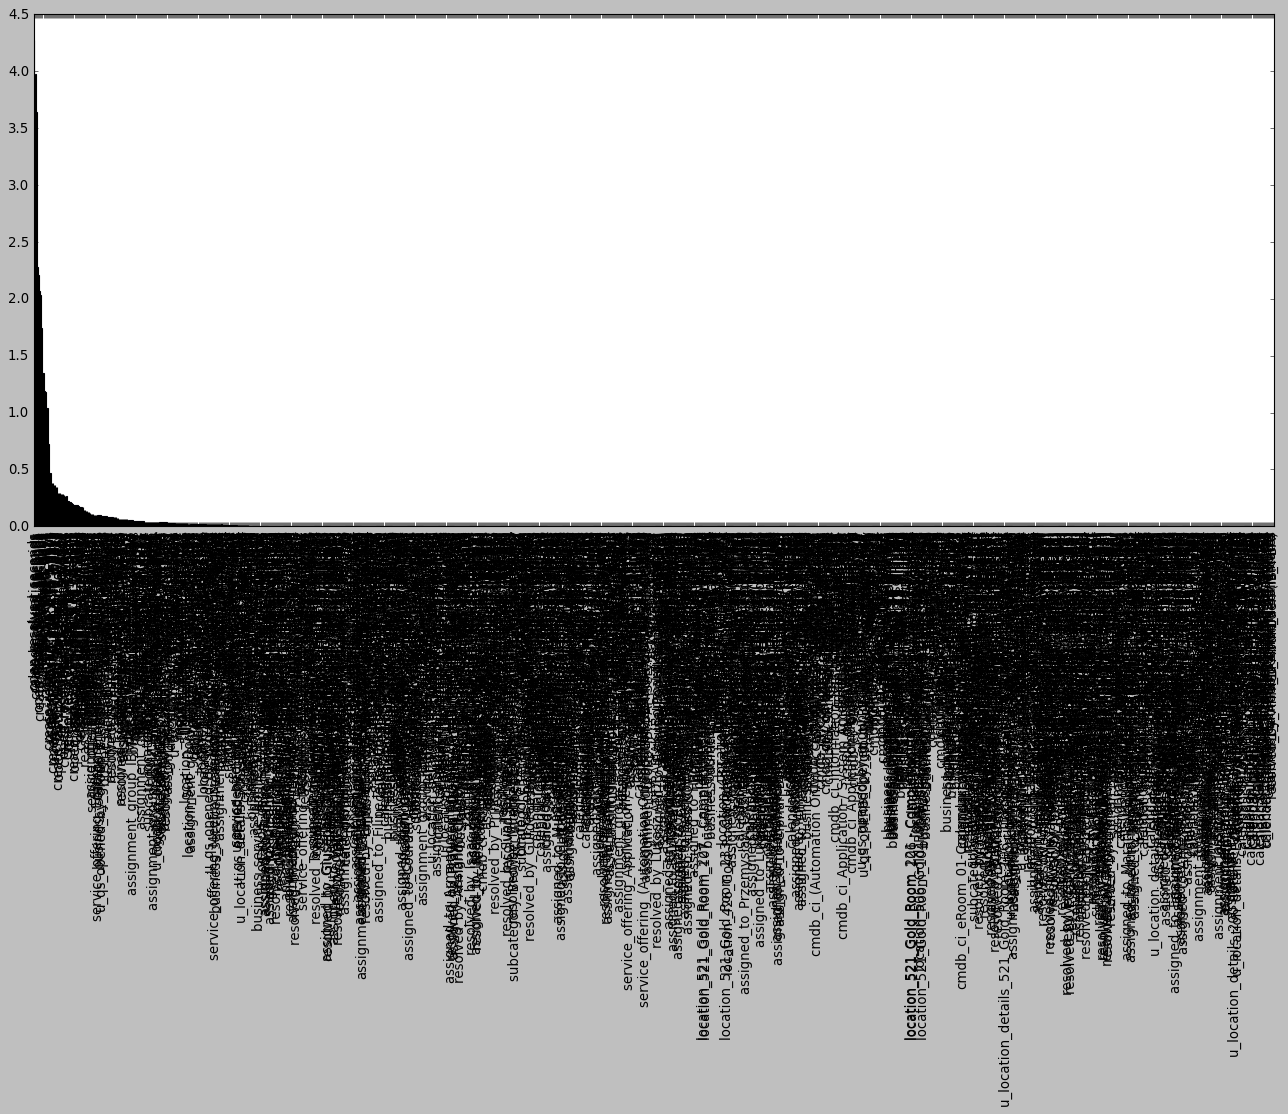

In [50]:
#let's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [51]:
from sklearn.feature_selection import SelectKBest

In [53]:
sel_five_cols = SelectKBest(mutual_info_regression,k=5)
sel_five_cols.fit(X_train_1_modified,y_train_1)
X_train_1_modified.columns[sel_five_cols.get_support()]

Index(['open_resolved_seconds', 'create_resolved_seconds',
       'open_closed_seconds', 'create_closed_seconds',
       'calendar_duration_mins'],
      dtype='object')

In [54]:
from sklearn.feature_selection import SelectPercentile

In [55]:
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=20)
selected_top_columns.fit(X_train_1_modified,y_train_1)
X_train_1_modified.columns[selected_top_columns.get_support()]

Index(['u_qs_times_reassigned', 'u_qs_major_incident',
       'u_end_of_support_No Support', 'u_end_of_support_Yes',
       'u_qs_opened_by_group_No Group',
       'u_qs_opened_by_group_IBM-SD-India SD L1-Rail',
       'u_qs_opened_by_group_BT-IBM-SI-Asset Governance-Rail',
       'u_qs_opened_by_group_IBM-SD-IN',
       'u_qs_opened_by_group_IBM-SD-Italy Turin SD L1-Rail',
       'u_qs_opened_by_group_IBM-AP-Asset Management',
       ...
       'create_resolved_age_8 to 14 days', 'create_resolved_age_4 to 7 days',
       'open_closed_days', 'open_closed_age_4 to 7 days',
       'open_closed_age_Over 2 weeks', 'open_closed_age_8 to 14 days',
       'create_closed_days', 'create_closed_age_4 to 7 days',
       'create_closed_age_Over 2 weeks', 'create_closed_age_8 to 14 days'],
      dtype='object', length=240)

## Standardization ##

In [44]:

from sklearn.preprocessing import StandardScaler

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
scaler = StandardScaler()

In [47]:
X_train_1_modified_scaled = scaler.fit_transform(X_train_1_modified)
X_test_1_modified_scaled = scaler.transform(X_test_1_modified)

## XGBRegression Forest regression with mean value approach ##

In [53]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\000K1G744\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [34]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

In [37]:
#XGBoost hyper-parameter tuning
def hyperParameterTuning(X_train, y_train):
    param_tuning = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['reg:squarederror']
    }
    

    xgb_model = XGBRegressor()

    gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                        
                           #scoring = 'neg_mean_absolute_error', #MAE
                           #scoring = 'neg_mean_squared_error',  #MSE
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1)
    gsearch.fit(X_train,y_train)

    return gsearch.best_params_


In [38]:
hyperParameterTuning(X_train_1_modified_scaled,y_train_1)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


{'colsample_bytree': 0.5,
 'learning_rate': 0.01,
 'max_depth': 10,
 'min_child_weight': 5,
 'n_estimators': 100,
 'objective': 'reg:squarederror',
 'subsample': 0.5}

In [48]:
xgb = XGBRegressor(colsample_bytree=0.5,min_child_weight=5,subsample=0.5,n_estimators=1000,max_depth = 10,learning_rate = 0.01,random_state=30)

In [49]:
xgb.fit(X_train_1_modified_scaled,y_train_1)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_delta_step=0,
             max_depth=10, min_child_weight=5, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=30,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [50]:
y_pred = xgb.predict(X_test_1_modified_scaled)

In [51]:
data1 = pd.DataFrame({'Actual': y_test_1, 'Predicted': y_pred})

In [52]:
data1

Actual    Predicted
89813      1.415556   -12.821731
66017      2.505556   -36.225548
101844    47.686111    61.790760
66590      2.802222    -1.781316
85433   4320.441667  4390.860840
118367     0.030278     1.560870
54720    110.670278   102.198883
73031      3.077222   -12.292779
42964    144.569444   120.861221
111208     7.294167     5.297039
83385     12.380278     6.934494
125284     1.275278    -4.321185
91023      0.117500     7.530630
82654      3.324444    -6.462724
22575    305.258611   288.397827
66894     22.065556    23.195179
43307      2.038889   -16.493599
32490   1029.796944   864.983093
1641       2.130556    -2.344657
54943      6.331389    19.891417
134173     0.120278    -3.052345
121543     4.524444     4.637086
127757  1511.340556  1314.309814
60536      0.959167   186.582321
1885       2.266944    11.700891
43553      3.269444   -11.049452
82384    139.738611   128.697433
36437    220.971389   225.103134
87105    314.307778   293.157410
1529       0.241111     0.559868
99890    213.186389   181.022064
51933     68.823611    58.225658
138832     2.140278   189.642578
27684      2.883056     5.420867
83481      3.166667     5.720490
137413    31.479167    30.889553
28415      2.127222    -9.012856
126816     4.169444     2.918497
140418  4404.477778  4500.687012
64320      3.444722   165.206284
134161     0.279167     0.515137
109945   158.868611   171.092957
2939       2.382778    -2.599941
52186      0.924444   -15.498092
105892     0.041389    -0.121371
64647      1.919444     0.463553
92228      0.881944    -3.498505
27204      3.515556    -5.298612
128832     7.416111    11.840587
60422   3519.474167  3923.407959
22909     71.270278   558.215759
19141     20.374722    15.418679
2087       0.083056     9.298704
134149     0.197222     0.700763
2944       1.381111   -16.903711
140451  3689.802500  4029.583984
123466     0.470278    -0.407314
36856      0.043333    -6.825907
35492     22.474444     0.201708
74483      1.397222    -3.498694
61706      0.049722     2.129478
112715   119.564167   107.980217
12454     73.430278    84.296227
84132      0.523889     3.156737
52174      0.101389     3.299071
32917      8.252222     4.231010
6448       3.680278   -17.240152
103918     0.296667   -11.701301
2194     296.832778   231.360275
112615     9.647778    19.008009
85464   4109.033889  4374.345215
121588  3485.077500  3500.315186
121803   146.796667   933.803894
62309   1935.725278  1882.525024
69192      0.370000   -15.454794
67839     47.070278   149.512482
121561     0.626111    -1.391060
128845     0.053611     1.594995
104178   168.624722   161.955139
33340      0.193889     8.060077
133001   141.620556   136.964188
127087     0.153611   -23.731476
7064       0.080278   -18.153677
110065     2.073611   202.796936
24568      7.906667    12.468562
32558    170.100000   152.177063
44159    770.111944   722.188354
33990    135.235278   124.939499
32948     25.619722    30.082567
100331    23.133056    30.997208
116899     0.212778     2.118576
121813   146.716389   944.705994
91739      0.152778     0.896237
123826    71.046111    88.702217
10295      0.066111     1.329331
100874    18.905278    20.977455
101012     0.636944    -2.140327
79626    307.494722   275.116943
123860   198.041667   181.340317
17359      0.737778    -2.497450
2095       6.841111     8.997851
108194   188.921389   170.962570
94138      1.803611    -5.030015
32839      4.108889    11.981650
137080    23.539444    28.896496
140808     0.059722     3.146869
100595     0.918333   182.946686
7395       0.281389    -1.183546
28611    186.271389   172.326141
17282   3938.786111  4333.335449
78472      0.943889   -20.391285
60525   3674.448056  4067.973145
86166    149.208889   121.442612
63238      2.795556     8.580293
135657    26.987778    22.198122
82255      0.085000    12.223078
126954    26.819722    33.535110
111207     2.793611    -8.647710
67618    641.061111   768.125732
50306    379.435833   349.777130
27527      1.156944 

## Mean Absolute Error , Mean Squared Error R sqaured and Adjusted R squared ##

In [53]:
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test_1,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test_1,y_pred)))

MSE 19489.752171711578
RMSE 139.605702504273


In [54]:
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test_1,y_pred))

MAE 53.35887647611385


In [55]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test_1,y_pred)
print(r2)

0.9790128772980493


In [56]:
Adj_r2 = 1 - (1-r2_score(y_test_1, y_pred)) * (len(y1)-1)/(len(y1)-X1.shape[1]-1)
print(Adj_r2)

0.972115011794611


In [57]:
# Calculate the absolute errors
errors = abs(y_pred - y_test_1)

In [58]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test_1)

In [59]:
mape

89813      1005.773748
66017      1545.809003
101844       29.578107
66590       163.567988
85433         1.629907
118367     5055.167930
54720         7.654625
73031       499.476478
42964        16.399194
111208       27.379792
83385        43.987573
125284      438.842620
91023      6309.046904
82654       294.400127
22575         5.523443
66894         5.119397
43307       908.950357
32490        16.004500
1641        210.049087
54943       214.171454
134173     2637.746451
121543        2.489630
127757       13.036820
60536     19352.544344
1885        416.152547
43553       437.961143
82384         7.901308
36437         1.869810
87105         6.729190
1529        132.203259
99890        15.087419
51933        15.398716
138832     8760.652579
27684        88.025078
83481        80.647052
137413        1.873028
28415       523.691302
126816       30.002729
140418        2.184351
64320      4695.924690
134161       84.526863
109945        7.694626
2939        209.113859
52186      

In [60]:
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: -1721.68 %.


C:\Users\000K1G744\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MTTR'>

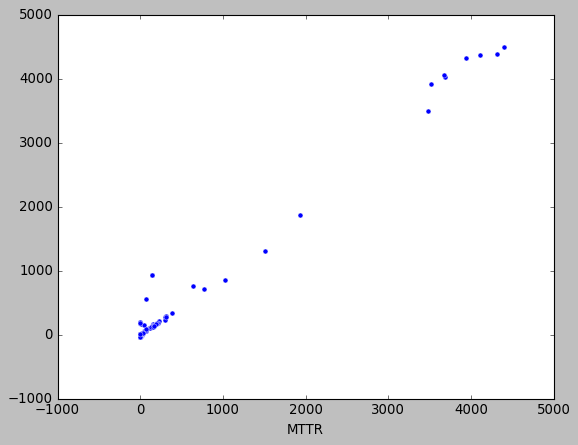

In [61]:
import seaborn as sns
sns.scatterplot(y_test_1, y_pred)

## Feature Importance ##

<AxesSubplot:>

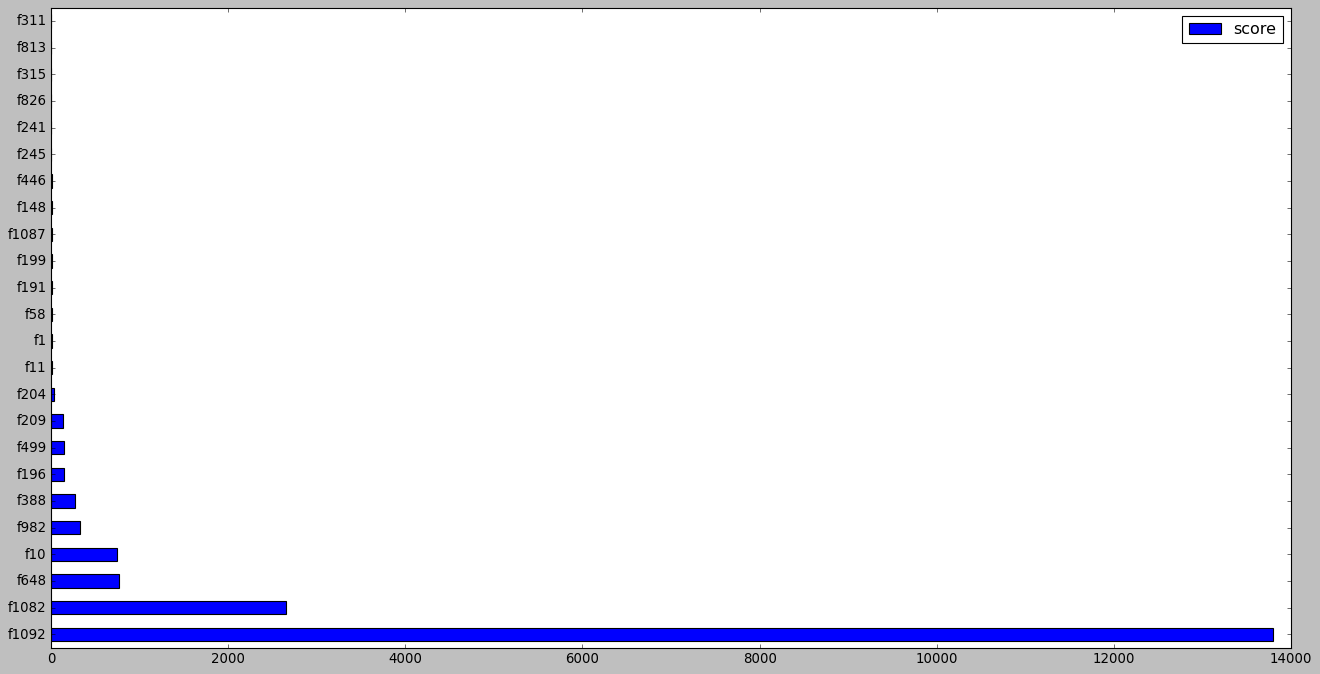

In [53]:
feature_important = xgb.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(40, columns="score").plot(kind='barh', figsize = (20,10)) ## plot top 40 features

In [54]:
sorted_idx = np.argsort(xgb.feature_importances_)[::-1]

In [55]:
for index in sorted_idx:
    print([X_train_1_modified.columns[index], xgb.feature_importances_[index]]) 

['business_duration_18 Days 19 Hours 26 Minutes', 0.3253914]
['open_resolved_seconds', 0.30898625]
['business_duration_79 Days', 0.29828215]
['open_lastupdated_seconds', 0.06071462]
['sys_mod_count', 0.0037119037]
['u_qs_times_reassigned', 0.002350775]
['u_qs_opened_by_group_BT-IBM-SI-Asset Governance-Rail', 0.00054250483]
['u_location_details_506 - Dorval Administrative Centre (CA)', 1.1046977e-05]
['u_location_details_516 - Dorval Completion Centre', 4.879896e-06]
['business_duration_33 Days 8 Hours', 4.1806297e-06]
['business_duration_39 Days 8 Hours 16 Minutes', 1.7554659e-07]
['business_duration_36 Days 8 Hours', 9.037895e-08]
['create_lastupdated_seconds', 3.7239405e-09]
['u_qs_opened_by_group_IBM-SD-IN', 3.080632e-09]
['calendar_duration_20 Minutes', 2.7615288e-09]
['assigned_to_Ernest DUDA (Bombardier - Transportation)', 1.9126423e-09]
['service_offering_Computer Software Offerings', 1.3264674e-09]
['calendar_duration_26 Minutes', 1.2042608e-09]
['service_offering_Enterprise Bu

['resolved_by_Puran Dudhane (IBM-BA)', 0.0]
['resolved_by_Rajesh Reddy Santhakudlur (IBM-BT)', 0.0]
['resolved_by_Rishi DIWAN (Bombardier - Transportation)', 0.0]
['resolved_by_Krzysztof OGRODNIK (Bombardier - Transportation)', 0.0]
['resolved_by_Joseph McDonough (IBM-BA)', 0.0]
['resolved_by_Shilpashree B S (Bombardier - Transportation)', 0.0]
['resolved_by_Harish Chikkamuniswamappa (IBM-BA)', 0.0]
['resolved_by_Abhishek Reddy Gangireddy (IBM-BT)', 0.0]
['resolved_by_Wing Hong Yau (IBM-BA)', 0.0]
['resolved_by_Nikhil TALWAR (Bombardier - Transportation)', 0.0]
['resolved_by_Ilaria Rossi (Innovaway spa-BA)', 0.0]
['resolved_by_Srinivas SAILA (Bombardier - Transportation)', 0.0]
['u_location_details_Zurich', 0.0]
['resolved_by_Naresh Rajoju (IBM-BA)', 0.0]
['resolved_by_Pranita Ralla (IBM-BA)', 0.0]
['resolved_by_Kamo St-Dic (IBM-BA)', 0.0]
['resolved_by_Bhavani Elangovan (IBM-BA)', 0.0]
['resolved_by_Filipe leite REIS (Bombardier - Transportation)', 0.0]
['resolved_by_Sebastian Wagenbr

['u_end_of_support_No Support', 0.0]
['u_end_of_support_Unknown', 0.0]
['u_end_of_support_Yes', 0.0]
['u_end_of_support_No', 0.0]
['u_qs_opened_by_group_No Group', 0.0]
['u_qs_opened_by_group_BT-IBM-APPR-SAP-Basis-Rail', 0.0]
['u_warranty_expired_No Warranty', 0.0]
['u_qs_opened_by_group_IBM-SD-Italy Turin SD L1-Rail', 0.0]
['u_qs_opened_by_group_IBM-SD-French-Aero', 0.0]
['u_qs_opened_by_group_IBM-AP-Asset Management', 0.0]
['u_qs_opened_by_group_IBM-SD-India CTS-Rail', 0.0]
['u_qs_opened_by_group_IBM-SD-Italy Naples SD L1-Rail', 0.0]
['u_qs_opened_by_group_IBM-AP-COTS-Maximo-Rail', 0.0]
['cmdb_ci_a010357p210', 0.0]
['cmdb_ci_Computer Software', 0.0]
['cmdb_ci_Active Directory Certificate Services', 0.0]
['cmdb_ci_Office Online', 0.0]
['cmdb_ci_Printing and Fax Services', 0.0]
['cmdb_ci_iflybombardier.com', 0.0]
['cmdb_ci_A011262P017', 0.0]
['cmdb_ci_Phone and Mobile Offerings', 0.0]
['cmdb_ci_Computer Hardware Offerings', 0.0]
['cmdb_ci_MAXIMO BT APAC PROD', 0.0]
['cmdb_ci_BUSPLB02FW

['business_duration_5 Days 19 Hours 2 Minutes', 0.0]
['business_duration_2 Days 1 Hour 32 Minutes', 0.0]
['business_duration_1 Hour 31 Minutes', 0.0]
['business_duration_1 Day 9 Hours 18 Minutes', 0.0]
['business_duration_4 Days 5 Hours 55 Minutes', 0.0]
['resolved_by_Hareesh Yerrajennu (IBM-BA)', 0.0]
['resolved_by_Yara MOHAMED (Bombardier - Transportation)', 0.0]
['resolved_by_Lucia Cinzia Massimo (Innovaway spa-BA)', 0.0]
['u_cause_No Cause', 0.0]
['u_cause_Telephone', 0.0]
['u_cause_e-mail and messaging', 0.0]
['u_cause_Printer', 0.0]
['u_cause_Security', 0.0]
['u_cause_Connectivity WAN - Configuration', 0.0]
['u_cause_Connectivity LAN - hardware', 0.0]
['u_cause_Power failure - Unplanned', 0.0]
['u_cause_Connectivity LAN - Configuration', 0.0]
['u_cause_Backup hardware', 0.0]
['u_cause_Connectivity LAN - utilization', 0.0]
['u_cause_Server - Hardware', 0.0]
['u_cause_Capacity related', 0.0]
['reopen_count', 0.0]
['location_559 - Montreal Head Office', 0.0]
['location_147 - Derby L

['category_No Category', 0.0]
['category_Software', 0.0]
['category_Network', 0.0]
['category_Video Conferencing / Webex', 0.0]
['category_Enterprise Phone', 0.0]
['category_Mobile Devices', 0.0]
['category_Printer and Fax', 0.0]
['category_General', 0.0]
['category_Notification Alert', 0.0]
['open_lastupdated_days', 0.0]
['location_503 - Saint-Laurent Marcel-Laurin', 0.0]
['location_183 - Bautzen', 0.0]
['location_531 - Frankfurt Gross-Gerau', 0.0]
['location_549 - Bangalore ESO', 0.0]
['location_199 - Gurgaon (RCS & IS Hub)', 0.0]
['location_200 - Savli (Vadodara)', 0.0]
['location_94 - St-Bruno', 0.0]
['location_521_Gold_Room_221 - Completion Center - Room 221 - Conference', 0.0]
['location_521_Gold_Room_106 - Completion Center - Room 106 - Conference', 0.0]
['location_T14 - Montreal Viger Data Centre', 0.0]
['location_523 - Dallas Learjet (Love Field)', 0.0]
['location_521_Gold_Room_104 - Completion Center - Room 104 - Conference', 0.0]
['location_189 - Hyderabad Engineering Center

['calendar_duration_12 Days 1 Hour 54 Minutes', 0.0]
['calendar_duration_1 Day 16 Hours 23 Minutes', 0.0]
['calendar_duration_1 Hour 26 Minutes', 0.0]
['calendar_duration_5 Days 19 Hours 27 Minutes', 0.0]
['calendar_duration_7 Days 13 Hours 42 Minutes', 0.0]
['calendar_duration_13 Days 20 Hours 13 Minutes', 0.0]
['calendar_duration_2 Hours 12 Minutes', 0.0]
['calendar_duration_2 Hours 58 Minutes', 0.0]
['calendar_duration_140 Days 4 Hours 7 Minutes', 0.0]
['calendar_duration_1 Day 3 Hours 55 Minutes', 0.0]
['calendar_duration_16 Days 3 Hours 40 Minutes', 0.0]
['calendar_duration_5 Days 7 Hours 54 Minutes', 0.0]
['calendar_duration_23 Days 17 Hours 31 Minutes', 0.0]
['calendar_duration_164 Days 2 Hours 44 Minutes', 0.0]
['calendar_duration_34 Minutes', 0.0]
['calendar_duration_8 Days 1 Hour 32 Minutes', 0.0]
['calendar_duration_164 Days 2 Hours 43 Minutes', 0.0]
['calendar_duration_5 Hours 7 Minutes', 0.0]
['calendar_duration_3 Days 16 Minutes', 0.0]
['calendar_duration_1 Hour 21 Minute

## High Category ##

In [56]:
dataframe_p2 = dataframe_p2.drop(['number','sys_created_by','task_effective_number','sys_updated_by','opened_by','sys_created_on','caller_id','u_qs_reported_by','sys_id','activity_due','xtracted_on','diff_seconds','diff_seconds_1','sys_updated_on','opened_at','resolved_at','work_end','work_start','closed_at'],axis=1)

In [57]:
dataframe_p2 = dataframe_p2.drop(['_index','_type','upon_reject','state','priority','sys_domain_path','u_qs_type','notify','sys_class_name','sla_due','u_escalation','escalation','upon_approval','u_sc_escalation','sys_domain','incident_state','severity','approval','account_prefix','account_name','account_domain','open_extracted_age','create_extracted_age'],axis=1)

In [58]:
## Splitting the dataframe based on training and testing ##
X2 = dataframe_p2[[i for i in list(dataframe_p2.columns) if i!='MTTR']]
y2 = dataframe_p2['MTTR']

In [59]:
## Split into train and test sets ##
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X2, y2, test_size=0.33, random_state=1)

In [60]:
X_train_2.shape,X_test_2.shape, y_train_2.shape, y_test_2.shape

((2193, 94), (1081, 94), (2193,), (1081,))

In [61]:

#Create object for one-hot encoding
encoder=ce.OneHotEncoder(cols=['u_end_of_support','u_qs_opened_by_group','u_warranty_expired','cmdb_ci','impact','business_duration','service_offering','assigned_to','u_location_details','resolved_by','business_service','subcategory','close_code','assignment_group','calendar_duration','contact_type','urgency','u_preferred_language','company','u_cause','location','category','open_lastupdated_age','create_lastupdated_age','day_of_week_created','month_year_created','day_of_week_opened','month_year_opened','day_of_week_resolved','month_year_resolved','day_of_week_closed','month_year_closed','reopen_count_range','reassignment_count_range','open_resolved_age','create_resolved_age','open_closed_age','create_closed_age'],handle_unknown='return_nan',return_df=True,use_cat_names=True)

In [62]:
X_train_2_new = encoder.fit_transform(X_train_2)
X_test_2_new = encoder.transform(X_test_2)

In [63]:
X_train_2_new.shape,X_test_2_new.shape

((2193, 4638), (1081, 4638))

In [64]:
X_train_2_new.columns[X_train_2_new.isna().any()].tolist()

[]

In [65]:
X_test_2_new.columns[X_test_2_new.isna().any()].tolist()

['u_qs_opened_by_group_No Group',
 'u_qs_opened_by_group_IBM-SD-India SD L1-Rail',
 'u_qs_opened_by_group_IBM-AP-Asset Management',
 'u_qs_opened_by_group_IBM-SD-Italy Turin SD L1-Rail',
 'u_qs_opened_by_group_IBM-MF-US-CONSOLE-OPS',
 'u_qs_opened_by_group_IBM-SD-IN',
 'u_qs_opened_by_group_IBM-SD-French-Aero',
 'u_qs_opened_by_group_IBM-SD-Italy Naples SD L1-Rail',
 'u_qs_opened_by_group_VEN-AP-SIMS-Rail',
 'u_qs_opened_by_group_IBM-SD-Spanish',
 'u_qs_opened_by_group_VEN-NTT-DS-Hemmersbach-Madrid-Staffed-ES-RAIL',
 'u_qs_opened_by_group_IBM-AP-COTS-Maximo-Rail',
 'u_qs_opened_by_group_APPR-BIS-APPL-CAB',
 'u_qs_opened_by_group_BA-IBM-DL-IMI-IN-Wintel',
 'u_qs_opened_by_group_IBM-AP-PDE CECC Projects-Aero',
 'u_qs_opened_by_group_IBM-AS-PKI Mgmt-Rail',
 'u_qs_opened_by_group_IBM-AP-ServiceNowAdmin-Rail',
 'u_qs_opened_by_group_BT-IBM-APPR-SAP-Basis-Rail',
 'u_qs_opened_by_group_BA-VEN-NTT-DS-Mirabel-MTL-AERO',
 'u_qs_opened_by_group_PC Refresh-IBM-SD-Naples-Rail',
 'u_qs_opened_by_gro

In [66]:
X_test_2_new = X_test_2_new.fillna(X_test_2_new.mean())

In [67]:
X_train_2_new.shape,X_test_2_new.shape

((2193, 4638), (1081, 4638))

In [68]:
X_train_2_new_scaled = scaler.fit_transform(X_train_2_new)
X_test_2_new_scaled = scaler.transform(X_test_2_new)

In [69]:
xgb = XGBRegressor(n_estimators=1000,max_depth = 10,learning_rate = 0.01,random_state=30)

In [77]:
xgb.fit(X_train_2_new_scaled,y_train_2)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=30,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [78]:
y_pred_2 = xgb.predict(X_test_2_new_scaled)

In [81]:
data1 = pd.DataFrame({'Actual': y_test_2, 'Predicted': y_pred_2})

In [82]:
data1

Actual    Predicted
11391      3.843889     3.851062
91177     17.528333    17.544367
54488    570.809722   571.191040
43786      0.747778     0.748827
33088      2.439167     2.438991
34241      3.363611     3.358884
87705      1.185000     1.184479
127335     1.509444     1.508818
126756   211.877500   211.957092
25725      1.011944     1.013623
13540      2.911944     2.913630
62421      0.475278     0.475299
95452      0.823611     0.820373
100973   242.442500   241.737915
70299    179.096111   178.942444
79148     10.315278    10.314709
4370       0.213056     0.213694
111572     1.861389     1.861808
5585     469.774722   471.942444
68754      0.424167     0.423340
47552      1.641944     1.642597
48767     50.920000    50.937325
77029      1.238056     1.240913
90884     41.703333    41.916641
42747    474.787500   476.033844
4252       4.977222     4.974236
77192      0.515833     0.517475
122025     0.875000     0.874015
128909     0.830556     0.830784
47875      9.531667     9.531402
119110     2.111389     2.106989
113172     0.091389     0.092020
25592      0.706389     0.706642
68708      0.462778     0.463124
70295    176.931667   177.009430
100356    91.198056    91.274567
715       65.129722    65.010048
19293     11.975556    11.972657
79110    178.842778   178.845398
79153     10.145556    10.162491
27660      4.319167     4.307114
77629      2.338611     2.337603
99046      0.796667     0.793641
116168     7.254167     7.245080
10096      1.054444     1.055349
38587     46.728056    46.521477
79180      2.763889     2.763770
13126      1.096667     1.101419
89421      0.993056     0.994598
83327      0.227778     0.229483
9673       0.256944     0.257385
71092      1.631667     1.630993
60406   3360.677778  3360.239990
97168      5.271667     5.265139
43984      0.879444     0.878972
124172    20.071389    20.015396
65457      0.628611     0.626309
28387      2.636111     2.635621
136436     0.300833     0.302798
97164      1.510556     1.510521
25621      0.252500     0.252903
8897       1.294167     1.294907
61497     77.884167    77.984344
70277     84.366111    84.064095
113164    21.787222    21.780895
125518     0.795278     0.793641
101968     4.213611     4.221331
23484      1.700278     1.700194
814        1.059167     1.060102
98231    120.435278   120.784935
74742      1.690833     1.697429
117816    24.820278    24.838743
19303     21.815833    21.780895
4429       0.528056     0.529930
105867     0.652222     0.652688
53225      2.091111     2.089647
4341     140.688056   141.269897
77943      0.433333     0.434128
65205     10.672500    10.686323
124026     3.295833     3.294262
22508      2.707500     2.705306
78725    171.783056   171.812103
29761     33.583889    34.154205
126529   309.201111   309.372101
11465      2.042222     2.041095
76891      4.622222     4.574142
122011     0.507778     0.507659
11737     10.997222    11.031032
79146     10.237500    10.234988
98613     19.328889    19.310423
102736    25.911389    26.006376
64011      1.588611     1.588141
134529     2.949722     2.950008
77586      3.503333     3.506335
115599   127.669722   129.201401
33852      1.784167     1.787412
47550      1.642500     1.642597
18779      2.418889     2.424296
83048      0.068889     0.068669
43879      0.610000     0.610458
33725     19.953611    19.975399
74352    172.829167   172.733002
96762      0.161667     0.163131
3326       0.232500     0.232867
88259      2.263611     2.262358
95186     25.343889    25.329533
14562      0.417500     0.417142
1947       0.314444     0.315158
99882      0.706389     0.706642
12100     22.555000    22.580849
115247   192.975556   193.003510
37450     61.845000    61.654827
4606       0.315000     0.315158
25402      1.492778     1.490247
125513     3.246944     3.253904
97710     17.775000    17.871902
18527      5.573611     5.575358
1391       1.626389     1.626238
79145     10.246389    10.253562
93919      3.411111     3.414981
804        1.788611 

In [83]:
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test_2,y_pred_2))
print("RMSE",np.sqrt(mean_squared_error(y_test_2,y_pred_2)))

MSE 13084.620453753738
RMSE 114.38802583205


In [84]:
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test_2,y_pred_2))

MAE 7.321369430010804


In [85]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test_2,y_pred_2)
print(r2)

0.932848706050728


In [122]:
Adj_r2 = 1 - (1-r2_score(y_test_2, y_pred_2)) * (len(y2)-1)/(len(y2)-X2.shape[1]-1)
print(Adj_r2)

0.9308631062925551


In [86]:
# Calculate the absolute errors
errors = abs(y_pred_2 - y_test_2)

In [87]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test_2)

In [88]:
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 99.37 %.


C:\Users\000K1G744\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MTTR'>

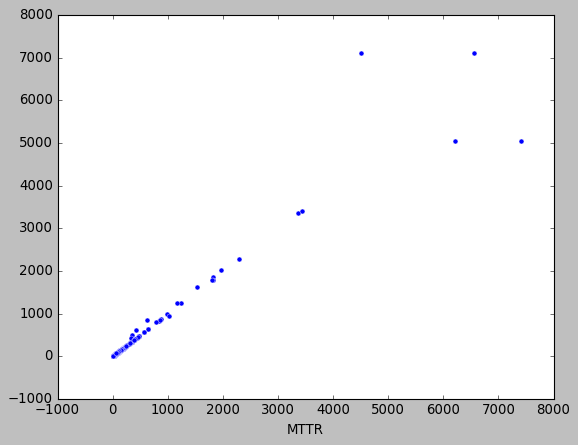

In [83]:
import seaborn as sns
sns.scatterplot(y_test_2, y_pred_2)

## Hyperparameter Tuning ##

In [89]:
params = { 'max_depth': [3,6,10],
           'learning_rate': [0.01, 0.05, 0.1],
           'n_estimators': [100, 500, 1000],
           'colsample_bytree': [0.3, 0.7]}

In [95]:
xgbr = XGBRegressor(seed = 20)

In [96]:
clf = GridSearchCV(estimator=xgbr, 
                   param_grid=params,
                   scoring='neg_mean_squared_error', 
                   verbose=1)

In [97]:
clf.fit(X_train_1_modified_scaled,y_train_1)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_esti...
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                    seed=20, su

In [98]:
print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

Best parameters: {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Lowest RMSE:  377.7262318211732


In [99]:
xgb_new = XGBRegressor(n_estimators=100,max_depth = 3,learning_rate = 0.1,colsample_bytree=0.3,random_state=30)

In [100]:
xgb_new.fit(X_train_1_modified_scaled,y_train_1)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=30,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [102]:
X_train_1_modified_scaled.shape,y_train_1.shape

((255, 1200), (255,))

In [103]:
X_test_1_modified_scaled.shape,y_test_1.shape

((126, 1200), (126,))

In [108]:
y_pred_new = xgb_new.predict(X_test_1_modified_scaled)

In [109]:
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test_1,y_pred_new))
print("RMSE",np.sqrt(mean_squared_error(y_test_1,y_pred_new)))

MSE 12245.790505603787
RMSE 110.66069991466613


In [110]:
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test_1,y_pred_new))

MAE 28.517181973802135


In [111]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test_1,y_pred_new)
print(r2)

0.9868133824556006


In [121]:
Adj_r2 = 1 - (1-r2_score(y_test_1, y_pred_new)) * (len(y1)-1)/(len(y1)-X1.shape[1]-1)
print(Adj_r2)

0.9824793193466022


In [112]:
# Calculate the absolute errors
errors = abs(y_pred_new - y_test_1)

In [113]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test_1)

In [115]:
mape

89813       16.716374
66017        7.474175
101844       4.725570
66590       28.377736
85433        9.305254
118367    1546.326901
54720        2.159149
73031        1.284559
42964        1.484541
111208       9.583634
83385        0.899306
125284     101.221634
91023      324.230809
82654        6.247465
22575        5.081862
66894        3.783465
43307       11.265118
32490        4.468045
1641        15.082916
54943       19.273905
134173     314.433331
121543       8.570324
127757       8.738837
60536       29.504444
1885         2.264789
43553        4.670319
82384        2.957286
36437        0.757230
87105        5.832526
1529       106.739208
99890        1.777098
51933        3.481628
138832      27.811100
27684       19.589273
83481        1.576286
137413       6.643556
28415       14.949852
126816       0.785705
140418      11.260397
64320        5.969893
134161      78.556848
109945       2.385660
2939         2.706582
52186        9.966301
105892    1104.359947
64647     

In [117]:
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: -7.18 %.


C:\Users\000K1G744\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MTTR'>

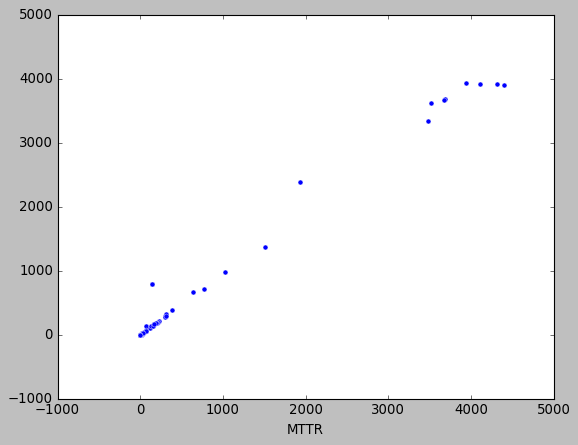

In [118]:
import seaborn as sns
sns.scatterplot(y_test_1, y_pred_new)

## Medium Category ##

In [71]:
dataframe_p3 = dataframe_p3.drop(['number','sys_created_by','task_effective_number','sys_updated_by','opened_by','sys_created_on','caller_id','u_qs_reported_by','sys_id','activity_due','xtracted_on','diff_seconds','diff_seconds_1','sys_updated_on','opened_at','resolved_at','work_end','work_start','closed_at'],axis=1)

In [72]:
dataframe_p3 = dataframe_p3.drop(['_index','_type','upon_reject','state','priority','sys_domain_path','u_qs_type','notify','sys_class_name','sla_due','u_escalation','escalation','upon_approval','u_sc_escalation','sys_domain','incident_state','severity','approval','account_prefix','account_name','account_domain','open_extracted_age','create_extracted_age'],axis=1)

In [38]:
dataframe_p3_ordinal = dataframe_p3.copy()

In [39]:
from sklearn.preprocessing import LabelEncoder

In [40]:
le = LabelEncoder()

In [41]:
dataframe_p3_ordinal['u_preferred_language'] = le.fit_transform(dataframe_p3_ordinal['u_preferred_language'])
dataframe_p3_ordinal['u_end_of_support'] = le.fit_transform(dataframe_p3_ordinal['u_end_of_support'])
dataframe_p3_ordinal['u_qs_opened_by_group'] = le.fit_transform(dataframe_p3_ordinal['u_qs_opened_by_group'])
dataframe_p3_ordinal['u_warranty_expired'] = le.fit_transform(dataframe_p3_ordinal['u_warranty_expired'])
dataframe_p3_ordinal['cmdb_ci'] = le.fit_transform(dataframe_p3_ordinal['cmdb_ci'])
dataframe_p3_ordinal['impact'] = le.fit_transform(dataframe_p3_ordinal['impact'])
dataframe_p3_ordinal['business_duration'] = le.fit_transform(dataframe_p3_ordinal['business_duration'])
dataframe_p3_ordinal['service_offering'] = le.fit_transform(dataframe_p3_ordinal['service_offering'])
dataframe_p3_ordinal['assigned_to'] = le.fit_transform(dataframe_p3_ordinal['assigned_to'])
dataframe_p3_ordinal['u_location_details'] = le.fit_transform(dataframe_p3_ordinal['u_location_details'])
dataframe_p3_ordinal['resolved_by'] = le.fit_transform(dataframe_p3_ordinal['resolved_by'])
dataframe_p3_ordinal['business_service'] = le.fit_transform(dataframe_p3_ordinal['business_service'])
dataframe_p3_ordinal['subcategory'] = le.fit_transform(dataframe_p3_ordinal['subcategory'])
dataframe_p3_ordinal['close_code'] = le.fit_transform(dataframe_p3_ordinal['close_code'])
dataframe_p3_ordinal['assignment_group'] = le.fit_transform(dataframe_p3_ordinal['assignment_group'])
dataframe_p3_ordinal['calendar_duration'] = le.fit_transform(dataframe_p3_ordinal['calendar_duration'])
dataframe_p3_ordinal['contact_type'] = le.fit_transform(dataframe_p3_ordinal['contact_type'])
dataframe_p3_ordinal['urgency'] = le.fit_transform(dataframe_p3_ordinal['urgency'])
dataframe_p3_ordinal['u_cause'] = le.fit_transform(dataframe_p3_ordinal['u_cause'])
dataframe_p3_ordinal['location'] = le.fit_transform(dataframe_p3_ordinal['location'])
dataframe_p3_ordinal['category'] = le.fit_transform(dataframe_p3_ordinal['category'])
dataframe_p3_ordinal['open_lastupdated_age'] = le.fit_transform(dataframe_p3_ordinal['open_lastupdated_age'])
dataframe_p3_ordinal['create_lastupdated_age'] = le.fit_transform(dataframe_p3_ordinal['create_lastupdated_age'])
dataframe_p3_ordinal['day_of_week_created'] = le.fit_transform(dataframe_p3_ordinal['day_of_week_created'])
dataframe_p3_ordinal['month_year_created'] = le.fit_transform(dataframe_p3_ordinal['month_year_created'])
dataframe_p3_ordinal['day_of_week_opened'] = le.fit_transform(dataframe_p3_ordinal['day_of_week_opened'])
dataframe_p3_ordinal['month_year_opened'] = le.fit_transform(dataframe_p3_ordinal['month_year_opened'])
dataframe_p3_ordinal['day_of_week_resolved'] = le.fit_transform(dataframe_p3_ordinal['day_of_week_resolved'])
dataframe_p3_ordinal['month_year_resolved'] = le.fit_transform(dataframe_p3_ordinal['month_year_resolved'])
dataframe_p3_ordinal['day_of_week_closed'] = le.fit_transform(dataframe_p3_ordinal['day_of_week_closed'])
dataframe_p3_ordinal['reopen_count_range'] = le.fit_transform(dataframe_p3_ordinal['reopen_count_range'])
dataframe_p3_ordinal['reassignment_count_range'] = le.fit_transform(dataframe_p3_ordinal['reassignment_count_range'])
dataframe_p3_ordinal['open_resolved_age'] = le.fit_transform(dataframe_p3_ordinal['open_resolved_age'])
dataframe_p3_ordinal['create_resolved_age'] = le.fit_transform(dataframe_p3_ordinal['create_resolved_age'])
dataframe_p3_ordinal['open_closed_age'] = le.fit_transform(dataframe_p3_ordinal['open_closed_age'])
dataframe_p3_ordinal['create_closed_age'] = le.fit_transform(dataframe_p3_ordinal['create_closed_age'])
dataframe_p3_ordinal['company'] = le.fit_transform(dataframe_p3_ordinal['company'])
dataframe_p3_ordinal['month_year_closed'] = le.fit_transform(dataframe_p3_ordinal['month_year_closed'])


In [42]:
dataframe_p3_ordinal['u_qs_major_incident'] = le.fit_transform(dataframe_p3_ordinal['u_qs_major_incident'])
dataframe_p3_ordinal['u_lan_bank_of_hours'] = le.fit_transform(dataframe_p3_ordinal['u_lan_bank_of_hours'])
dataframe_p3_ordinal['u_qs_fcresolve'] = le.fit_transform(dataframe_p3_ordinal['u_qs_fcresolve'])
dataframe_p3_ordinal['knowledge'] = le.fit_transform(dataframe_p3_ordinal['knowledge'])
dataframe_p3_ordinal['active'] = le.fit_transform(dataframe_p3_ordinal['active'])
dataframe_p3_ordinal['u_sla_held'] = le.fit_transform(dataframe_p3_ordinal['u_sla_held'])
dataframe_p3_ordinal['u_mio_invoked'] = le.fit_transform(dataframe_p3_ordinal['u_mio_invoked'])
dataframe_p3_ordinal['u_escalation_level_2'] = le.fit_transform(dataframe_p3_ordinal['u_escalation_level_2'])
dataframe_p3_ordinal['made_sla'] = le.fit_transform(dataframe_p3_ordinal['made_sla'])
dataframe_p3_ordinal['u_escalation_level_1'] = le.fit_transform(dataframe_p3_ordinal['u_escalation_level_1'])
dataframe_p3_ordinal['u_vip_gold_room_service'] = le.fit_transform(dataframe_p3_ordinal['u_vip_gold_room_service'])
dataframe_p3_ordinal['u_qs_rca_required'] = le.fit_transform(dataframe_p3_ordinal['u_qs_rca_required'])
dataframe_p3_ordinal['u_callback_netcool'] = le.fit_transform(dataframe_p3_ordinal['u_callback_netcool'])

In [43]:
X3 = dataframe_p3_ordinal[[i for i in list(dataframe_p3_ordinal.columns) if i!='MTTR']]
y3 = dataframe_p3_ordinal['MTTR']

In [44]:
## Split into train and test sets ##
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X3, y3, test_size=0.33, random_state=1)

In [ ]:
X_train_1_modified = X_train_1_new.fillna(X_test_1_new.mean())
X_test_1_modified = X_test_1_new.fillna(X_test_1_new.mean())

In [45]:
X_train_3.columns[X_train_3.isna().any()].tolist()

[]

In [46]:
X_test_3.columns[X_test_3.isna().any()].tolist()

[]

In [71]:
X_train_3 = X_train_3.fillna(X_train_3.mean())
X_test_3 = X_test_3.fillna(X_test_3.mean())

In [72]:
X_train_3_scaled = scaler.fit_transform(X_train_3)
X_test_3_scaled = scaler.transform(X_test_3)

In [73]:
xgb1 = XGBRegressor(n_estimators=1000,max_depth = 10,learning_rate = 0.01,random_state=30)

In [105]:
xgb1.fit(X_train_3_scaled,y_train_3)

NameError: name 'xgb1' is not defined

In [75]:
y_pred_3 = xgb1.predict(X_test_3_scaled)

In [76]:
data3 = pd.DataFrame({'Actual': y_test_3, 'Predicted': y_pred_3})

In [77]:
data3

Actual     Predicted
40538       0.026667      0.027255
73490      18.525000     18.520931
93921      19.214167     19.213593
129586      8.363889      8.368218
21697      95.587778     95.556656
31988      12.628611     12.625409
35906      13.192778     13.193271
86492       0.082778      0.082787
95465      32.140833     32.142754
122094      1.595833      1.595968
100880     91.956111     91.980942
11486       0.430833      0.430248
19893     170.914444    170.909836
78395       1.325000      1.324731
93093       0.084444      0.084441
114098    595.528056    594.724976
130306      3.623333      3.622372
31066      51.487500     51.468990
138415      8.729167      8.726328
86784     387.684167    387.589355
11595       1.348056      1.348314
114343      7.988333      7.985996
139028      7.080278      7.082146
37769       2.353333      2.353637
54991      55.962500     55.965446
129045      0.082778      0.082787
120571      0.154167      0.154867
115442      1.416944      1.416735
127306      0.056389      0.056545
119051      2.406111      2.411774
92053       0.167778      0.167830
92790       0.361389      0.360701
136352      0.098056      0.098452
54192     171.200278    171.217545
132530     49.712778     49.838734
68357       0.035556      0.035763
122164      1.820556      1.820405
39122       0.665278      0.664969
41776       0.043056      0.043199
53639      79.453611     79.427460
30410       0.608333      0.606984
16132       0.082778      0.082787
123220    166.978611    166.939575
76685    1202.812778   1202.101929
80336       4.679722      4.678925
97873      35.462778     35.461834
80333    2440.804167   2443.129883
115188    294.674444    294.531128
61461      74.723611     74.726089
83400       0.023056      0.024262
11118     842.918889    842.777649
84453       0.014167      0.016513
138109      7.044167      7.042808
139728     21.431667     21.426085
45015       0.033333      0.033557
86850       0.026389      0.027015
49598       0.082778      0.082787
117978      4.859722      4.859100
117014      0.054167      0.054105
82856       0.033056      0.033279
99960     254.280000    254.415375
17086      13.955556     13.958122
72441       0.418056      0.417942
38473       0.052500      0.052527
48550       0.032222      0.032460
107446      0.044167      0.044300
28728       0.250278      0.250197
126181    332.280833    332.227753
8733      342.785556    342.670685
45524       9.304444      9.301887
115618      9.805833      9.806565
43971       0.156667      0.156423
113494      3.867500      3.867760
61515    7246.831667   7188.656250
133882     46.561389     46.562134
86128       0.028056      0.028487
127839      5.462222      5.457959
44555       0.082778      0.082787
116313     10.156111     10.155897
14489      19.469722     19.476566
128206      5.160556      5.162004
33427     109.520556    109.515480
80899       0.027778      0.028236
129369    110.403889    110.483994
78170       0.031944      0.032189
23859       0.021389      0.022984
70255      10.370833     10.368119
133643     25.613056     25.611914
130440      0.077778      0.077714
139655      1.152500      1.152271
137484      0.052500      0.052527
130391      0.084444      0.084441
138478      8.468333      8.468364
79102      56.700278     56.707943
88731    2415.838889   2380.444824
6124        0.246389      0.246640
71601       0.428611      0.428015
50838       7.261389      7.258387
133629     28.342222     28.333508
108045     17.610000     17.609779
1093       24.897500     24.886240
38724       3.917778      3.916369
105101     15.396944     15.396356
27416      27.959722     27.949638
80148      54.118889     54.116081
109322      0.043333      0.043477
66258     153.690000    153.780075
115579      0.085278      0.085256
15448       1.938333      1.939223
99256      31.956389     31.943531
28694       0.166944      0.166035
65169       0.051111      0.051277
127132      0.067778      0.068214
115105      0.228889    

In [79]:
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test_3,y_pred_3))
print("RMSE",np.sqrt(mean_squared_error(y_test_3,y_pred_3)))

MSE 3029.3002981356613
RMSE 55.039079735544824


In [80]:
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test_3,y_pred_3))

MAE 1.4983622596545831


In [81]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test_3,y_pred_3)
print(r2)

0.9907375328259015


In [82]:
Adj_r2 = 1 - (1-r2_score(y_test_3, y_pred_3)) * (len(y3)-1)/(len(y3)-X3.shape[1]-1)
print(Adj_r2)

0.9907124594806354


In [83]:
# Calculate the absolute errors
errors = abs(y_pred_3 - y_test_3)

In [84]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test_3)

In [86]:
mape

40538        2.205973
73490        0.021964
93921        0.002988
129586       0.051765
21697        0.032558
31988        0.025355
35906        0.003736
86492        0.011096
95465        0.005975
122094       0.008409
100880       0.027003
11486        0.135973
19893        0.002696
78395        0.020284
93093        0.004098
114098       0.134852
130306       0.026534
31066        0.035950
138415       0.032521
86784        0.024456
11595        0.019184
114343       0.029256
139028       0.026389
37769        0.012913
54991        0.005265
129045       0.011096
120571       0.454556
115442       0.014811
127306       0.277278
119051       0.235341
92053        0.031280
92790        0.190314
136352       0.404247
54192        0.010086
132530       0.253367
68357        0.583823
122164       0.008263
39122        0.046481
41776        0.333782
53639        0.032914
30410        0.221776
16132        0.011096
123220       0.023378
76685        0.059099
80336        0.017035
97873     

C:\Users\000K1G744\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MTTR'>

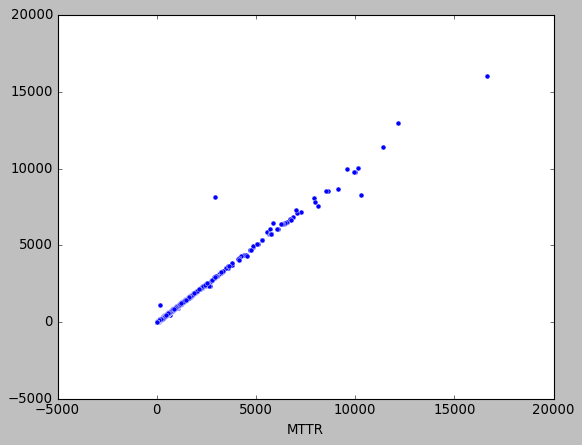

In [87]:
import seaborn as sns
sns.scatterplot(y_test_3, y_pred_3)

## Low Category ##

In [87]:
ataframe_p4 = dataframe_p4.drop(['number','sys_created_by','task_effective_number','work_start','sys_updated_by','opened_by','sys_created_on','caller_id','u_qs_reported_by','sys_id','activity_due','xtracted_on','diff_seconds','diff_seconds_1','sys_updated_on','opened_at','resolved_at','work_end','work_start','closed_at'],axis=1)

In [74]:
dataframe_p4 = dataframe_p4.drop(['_index','_type','upon_reject','state','priority','sys_domain_path','u_qs_type','notify','sys_class_name','sla_due','u_escalation','escalation','upon_approval','u_sc_escalation','sys_domain','incident_state','severity','approval','account_prefix','account_name','account_domain','open_extracted_age','create_extracted_age'],axis=1)

In [88]:
dataframe_p4_ordinal = dataframe_p4.copy()

In [89]:
from sklearn.preprocessing import LabelEncoder

In [90]:
le = LabelEncoder()

In [91]:
dataframe_p4_ordinal['u_preferred_language'] = le.fit_transform(dataframe_p4_ordinal['u_preferred_language'])
dataframe_p4_ordinal['u_end_of_support'] = le.fit_transform(dataframe_p4_ordinal['u_end_of_support'])
dataframe_p4_ordinal['u_qs_opened_by_group'] = le.fit_transform(dataframe_p4_ordinal['u_qs_opened_by_group'])
dataframe_p4_ordinal['u_warranty_expired'] = le.fit_transform(dataframe_p4_ordinal['u_warranty_expired'])
dataframe_p4_ordinal['cmdb_ci'] = le.fit_transform(dataframe_p4_ordinal['cmdb_ci'])
dataframe_p4_ordinal['impact'] = le.fit_transform(dataframe_p4_ordinal['impact'])
dataframe_p4_ordinal['business_duration'] = le.fit_transform(dataframe_p4_ordinal['business_duration'])
dataframe_p4_ordinal['service_offering'] = le.fit_transform(dataframe_p4_ordinal['service_offering'])
dataframe_p4_ordinal['assigned_to'] = le.fit_transform(dataframe_p4_ordinal['assigned_to'])
##dataframe_p4_ordinal['u_location_details'] = le.fit_transform(dataframe_p4_ordinal['u_location_details'])
dataframe_p4_ordinal['resolved_by'] = le.fit_transform(dataframe_p4_ordinal['resolved_by'])
dataframe_p4_ordinal['business_service'] = le.fit_transform(dataframe_p4_ordinal['business_service'])
dataframe_p4_ordinal['subcategory'] = le.fit_transform(dataframe_p4_ordinal['subcategory'])
dataframe_p4_ordinal['close_code'] = le.fit_transform(dataframe_p4_ordinal['close_code'])
dataframe_p4_ordinal['assignment_group'] = le.fit_transform(dataframe_p4_ordinal['assignment_group'])
dataframe_p4_ordinal['calendar_duration'] = le.fit_transform(dataframe_p4_ordinal['calendar_duration'])
dataframe_p4_ordinal['contact_type'] = le.fit_transform(dataframe_p4_ordinal['contact_type'])
dataframe_p4_ordinal['urgency'] = le.fit_transform(dataframe_p4_ordinal['urgency'])
dataframe_p4_ordinal['u_cause'] = le.fit_transform(dataframe_p4_ordinal['u_cause'])
dataframe_p4_ordinal['location'] = le.fit_transform(dataframe_p4_ordinal['location'])
dataframe_p4_ordinal['category'] = le.fit_transform(dataframe_p4_ordinal['category'])
dataframe_p4_ordinal['open_lastupdated_age'] = le.fit_transform(dataframe_p4_ordinal['open_lastupdated_age'])
dataframe_p4_ordinal['create_lastupdated_age'] = le.fit_transform(dataframe_p4_ordinal['create_lastupdated_age'])
dataframe_p4_ordinal['day_of_week_created'] = le.fit_transform(dataframe_p4_ordinal['day_of_week_created'])
dataframe_p4_ordinal['month_year_created'] = le.fit_transform(dataframe_p4_ordinal['month_year_created'])
dataframe_p4_ordinal['day_of_week_opened'] = le.fit_transform(dataframe_p4_ordinal['day_of_week_opened'])
dataframe_p4_ordinal['month_year_opened'] = le.fit_transform(dataframe_p4_ordinal['month_year_opened'])
dataframe_p4_ordinal['day_of_week_resolved'] = le.fit_transform(dataframe_p4_ordinal['day_of_week_resolved'])
dataframe_p4_ordinal['month_year_resolved'] = le.fit_transform(dataframe_p4_ordinal['month_year_resolved'])
dataframe_p4_ordinal['day_of_week_closed'] = le.fit_transform(dataframe_p4_ordinal['day_of_week_closed'])
dataframe_p4_ordinal['reopen_count_range'] = le.fit_transform(dataframe_p4_ordinal['reopen_count_range'])
dataframe_p4_ordinal['reassignment_count_range'] = le.fit_transform(dataframe_p4_ordinal['reassignment_count_range'])
dataframe_p4_ordinal['open_resolved_age'] = le.fit_transform(dataframe_p4_ordinal['open_resolved_age'])
dataframe_p4_ordinal['create_resolved_age'] = le.fit_transform(dataframe_p4_ordinal['create_resolved_age'])
dataframe_p4_ordinal['open_closed_age'] = le.fit_transform(dataframe_p4_ordinal['open_closed_age'])
dataframe_p4_ordinal['create_closed_age'] = le.fit_transform(dataframe_p4_ordinal['create_closed_age'])
dataframe_p4_ordinal['company'] = le.fit_transform(dataframe_p4_ordinal['company'])
dataframe_p4_ordinal['month_year_closed'] = le.fit_transform(dataframe_p4_ordinal['month_year_closed'])


In [92]:
dataframe_p4_ordinal = dataframe_p4_ordinal.drop(['u_location_details'],axis=1)

In [93]:
dataframe_p4_ordinal['u_qs_major_incident'] = le.fit_transform(dataframe_p4_ordinal['u_qs_major_incident'])
dataframe_p4_ordinal['u_lan_bank_of_hours'] = le.fit_transform(dataframe_p4_ordinal['u_lan_bank_of_hours'])
dataframe_p4_ordinal['u_qs_fcresolve'] = le.fit_transform(dataframe_p4_ordinal['u_qs_fcresolve'])
dataframe_p4_ordinal['knowledge'] = le.fit_transform(dataframe_p4_ordinal['knowledge'])
dataframe_p4_ordinal['active'] = le.fit_transform(dataframe_p4_ordinal['active'])
dataframe_p4_ordinal['u_sla_held'] = le.fit_transform(dataframe_p4_ordinal['u_sla_held'])
dataframe_p4_ordinal['u_mio_invoked'] = le.fit_transform(dataframe_p4_ordinal['u_mio_invoked'])
dataframe_p4_ordinal['u_escalation_level_2'] = le.fit_transform(dataframe_p4_ordinal['u_escalation_level_2'])
dataframe_p4_ordinal['made_sla'] = le.fit_transform(dataframe_p4_ordinal['made_sla'])
dataframe_p4_ordinal['u_escalation_level_1'] = le.fit_transform(dataframe_p4_ordinal['u_escalation_level_1'])
dataframe_p4_ordinal['u_vip_gold_room_service'] = le.fit_transform(dataframe_p4_ordinal['u_vip_gold_room_service'])
dataframe_p4_ordinal['u_qs_rca_required'] = le.fit_transform(dataframe_p4_ordinal['u_qs_rca_required'])
dataframe_p4_ordinal['u_callback_netcool'] = le.fit_transform(dataframe_p4_ordinal['u_callback_netcool'])

In [94]:
list(dataframe_p4_ordinal.columns)

['_score',
 'u_qs_times_reassigned',
 'sys_updated_on',
 'u_qs_major_incident',
 'u_end_of_support',
 'u_qs_opened_by_group',
 'number',
 'u_warranty_expired',
 'u_lan_bank_of_hours',
 'u_qs_fcresolve',
 'sys_created_by',
 'knowledge',
 'cmdb_ci',
 'impact',
 'active',
 'business_duration',
 'work_start',
 'service_offering',
 'u_sla_held',
 'reassignment_count',
 'assigned_to',
 'u_mio_invoked',
 'u_escalation_level_2',
 'made_sla',
 'u_escalation_level_1',
 'child_incidents',
 'task_effective_number',
 'resolved_by',
 'sys_updated_by',
 'opened_by',
 'sys_created_on',
 'calendar_stc',
 'closed_at',
 'business_service',
 'opened_at',
 'work_end',
 'caller_id',
 'resolved_at',
 'subcategory',
 'u_vip_gold_room_service',
 'close_code',
 'assignment_group',
 'business_stc',
 'calendar_duration',
 'u_qs_reported_by',
 'sys_id',
 'contact_type',
 'u_qs_rca_required',
 'urgency',
 'u_preferred_language',
 'company',
 'u_callback_netcool',
 'activity_due',
 'u_qs_times_reopened',
 'sys_mod_c

In [97]:
X4 = dataframe_p4_ordinal[[i for i in list(dataframe_p4_ordinal.columns) if i!='MTTR']]
y4 = dataframe_p4_ordinal['MTTR']

In [96]:
dataframe_p4_ordinal=dataframe_p4_ordinal.drop(['work_start','number','sys_created_by','task_effective_number','work_start','sys_updated_by','opened_by','sys_created_on','caller_id','u_qs_reported_by','sys_id','activity_due','xtracted_on','diff_seconds','diff_seconds_1','sys_updated_on','opened_at','resolved_at','work_end','work_start','closed_at'],axis=1)

In [98]:
## Split into train and test sets ##
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X4, y4, test_size=0.33, random_state=1)

In [99]:
X_train_4.columns[X_train_4.isna().any()].tolist()

[]

In [100]:
X_test_4.columns[X_test_4.isna().any()].tolist()

[]

In [101]:
X_train_4_scaled = scaler.fit_transform(X_train_4)
X_test_4_scaled = scaler.transform(X_test_4)

In [104]:
xgb10 = XGBRegressor(n_estimators=1000,max_depth = 10,learning_rate = 0.01,random_state=30)

In [107]:
xgb10.fit(X_train_4_scaled,y_train_4)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=30,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [109]:
y_pred_4 = xgb10.predict(X_test_4_scaled)

In [110]:
data10 = pd.DataFrame({'Actual': y_test_4, 'Predicted': y_pred_4})

In [112]:
len(data10)

32104

In [113]:
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test_4,y_pred_4))
print("RMSE",np.sqrt(mean_squared_error(y_test_4,y_pred_4)))

MSE 3734.3479270306307
RMSE 61.10931129566615


In [114]:
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test_4,y_pred_4))

MAE 1.0285316896917613


In [115]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test_4,y_pred_4)
print(r2)

0.9958315972675326


In [117]:
Adj_r2 = 1 - (1-r2_score(y_test_4, y_pred_4)) * (len(y4)-1)/(len(y4)-X4.shape[1]-1)
print(Adj_r2)

0.9958276085295672


C:\Users\000K1G744\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MTTR'>

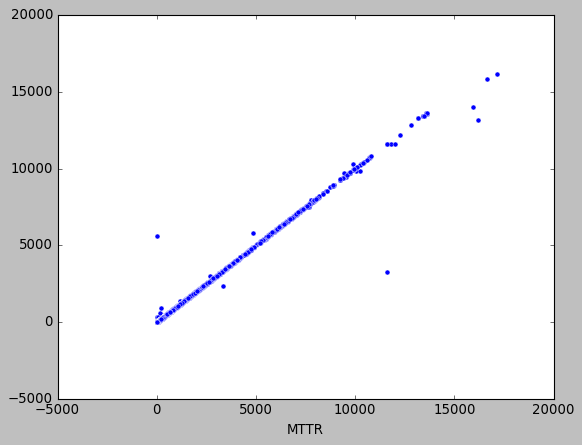

In [118]:

import seaborn as sns
sns.scatterplot(y_test_4, y_pred_4)
